<a href="https://colab.research.google.com/github/Ash100/Trainings/blob/main/NP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical Data Science for Nanomaterial Safety: Analyzing ZnO, CuO, TiO2, Fe2O3, and Al2O3 Toxicity and Predictions**
### **Dr. Ashfaq Ahmad**, Department of Bioinformatics, Hazara University
### Nanomaterials : A Journey Through Progress, Emerging Trends and Future Challenges
July 22-23, 2025.

Introduction

Nanoparticles (NPs) are widely used across various industries, but concerns remain about their potential toxicity. This project aims to develop a machine learning model that predicts nanoparticle toxicity based on their physicochemical properties.

The dataset used in this study was obtained from Kaggle, and the following steps were performed: • Data preprocessing: Handling missing values, encoding categorical variables, and scaling numerical features. • Dataset splitting: Dividing the data into training and testing sets. • Model training: Implementing a Random Forest Classifier to predict toxicity. • Performance evaluation: Assessing model accuracy and feature importance. • Hyperparameter tuning: Using GridSearchCV to optimize model performance. • Model deployment: Saving and loading the trained model for future predictions.

In [ ]:
#@title Libraries Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
#@title Loading the dataset from local computer
import pandas as pd
from google.colab import files

# Upload the file manually
uploaded = files.upload()

# Extract the filename (assumes only one file is uploaded)
file_path = next(iter(uploaded))

# Load the dataset
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:")
df.info()

# Show the first few rows
df.head()


Saving nanotoxixicity_dataset.csv to nanotoxixicity_dataset.csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         881 non-null    object 
 1   coresize    881 non-null    float64
 2   hydrosize   881 non-null    float64
 3   surfcharge  881 non-null    float64
 4   surfarea    881 non-null    float64
 5   Ec          881 non-null    float64
 6   Expotime    881 non-null    int64  
 7   dosage      881 non-null    float64
 8   e           881 non-null    float64
 9   NOxygen     881 non-null    int64  
 10  class       881 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 75.8+ KB


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic


In [ ]:
#@title Check for missing values
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing Values in Each Column:
NPs           0
coresize      0
hydrosize     0
surfcharge    0
surfarea      0
Ec            0
Expotime      0
dosage        0
e             0
NOxygen       0
class         0
dtype: int64

Number of duplicate rows: 487


In [ ]:
#@title Check for duplicate rows
# Remove duplicate rows
df = df.drop_duplicates()

# Check the new shape of the dataset
print("New dataset shape after removing duplicates:", df.shape)

New dataset shape after removing duplicates: (394, 11)


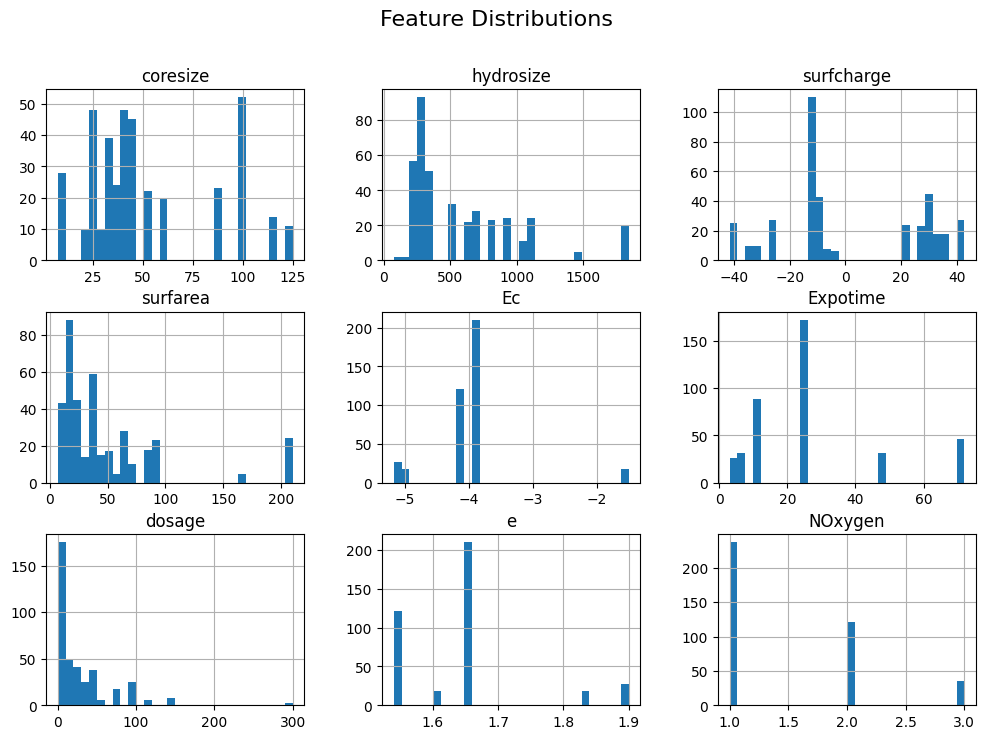

<ipython-input-5-43acd8c85b54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


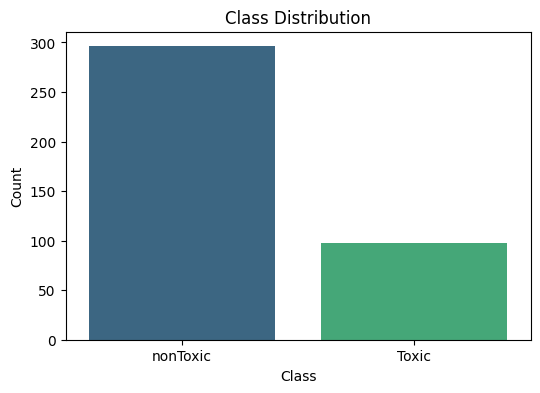

In [ ]:
#@title Let's Explore data patterens
# Feature Distributions (Histograms for numerical features)
df.hist(figsize=(12, 8), bins=30)
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Class Distribution (for classification tasks)
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
#@title coresize Vs Toxicity
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

# Just the boxplot — no individual points
sns.boxplot(x='class', y='coresize', data=df, palette='pastel', showfliers=False)

plt.title('Relationship Between Core Size and Toxicity', fontsize=14)
plt.xlabel('Toxicity Class')
plt.ylabel('Core Size (nm)')
plt.tight_layout()
plt.show()


In [ ]:
group_nonToxic = df[df['class'] == 'nonToxic']['coresize']
group_Toxic = df[df['class'] == 'Toxic']['coresize']  # Capital 'T'


In [ ]:
from scipy.stats import mannwhitneyu

# Mann–Whitney U test
if not group_nonToxic.empty and not group_Toxic.empty:
    stat, p_value = mannwhitneyu(group_nonToxic, group_Toxic, alternative='two-sided')
    print(f"Mann–Whitney U test statistic: {stat:.3f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("🔬 Statistically significant difference in core size between Toxic and nonToxic groups.")
    else:
        print("ℹ️ No statistically significant difference in core size between groups.")
else:
    print("⚠️ One or both groups are empty — check filtering.")


Mann–Whitney U test statistic: 9809.500
P-value: 0.0000
🔬 Statistically significant difference in core size between Toxic and nonToxic groups.


In [ ]:
#@title Data processing for Machine Learning Models
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the categorical variable 'NPs' and 'class'
label_encoders = {}
for col in ["NPs", "class"]:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Save label encoders for future use
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Scale numerical features
scaler = StandardScaler()
numeric_cols = df.columns[df.dtypes != "object"].tolist()  # Get numeric column names
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Show transformed dataset
print("Preprocessing Completed!")
print(df.head())
print(df.head())

Preprocessing Completed!
        NPs  coresize  hydrosize  surfcharge  surfarea        Ec  Expotime  \
0 -2.728513 -0.395962  -0.751602    1.328941   0.31775  3.773641 -0.100883   
1 -2.728513 -0.395962  -0.751602    1.328941   0.31775  3.773641 -0.100883   
2 -2.728513 -0.395962  -0.751602    1.328941   0.31775  3.773641 -0.100883   
3 -2.728513 -0.395962  -0.751602    1.328941   0.31775  3.773641 -0.100883   
4 -2.728513 -0.395962  -0.751602    1.328941   0.31775  3.773641 -0.100883   

     dosage         e   NOxygen     class toxicity_label  
0 -0.767817 -0.306042  2.295929  0.575396            NaN  
1 -0.767593 -0.306042  2.295929  0.575396            NaN  
2 -0.765356 -0.306042  2.295929  0.575396            NaN  
3 -0.742985 -0.306042  2.295929  0.575396            NaN  
4 -0.643559 -0.306042  2.295929  0.575396            NaN  
        NPs  coresize  hydrosize  surfcharge  surfarea        Ec  Expotime  \
0 -2.728513 -0.395962  -0.751602    1.328941   0.31775  3.773641 -0.100883

In [ ]:
#@title Splitting data in Training and Testing set
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=["class"])  # Features
y = df["class"]  # Target (toxicity class)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (315, 11), X_test shape: (79, 11)
y_train shape: (315,), y_test shape: (79,)


In [ ]:
#@title Label Encoding
from sklearn.preprocessing import LabelEncoder

# Ensure target labels are categorical
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  #Use transform to keep consistency

# Print unique labels
print("Encoded classes:", label_encoder.classes_)

Encoded classes: [-1.73793215  0.57539646]


In [ ]:
#@title Let's Train Random Forest Model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)  # This will work correctly

RandomForestRegressor()

In [ ]:
import pandas as pd

# Convert y_train to a Pandas Series
y_train_series = pd.Series(y_train)

# Now you can use .head()
print(y_train_series.head())
print(y_train_series.dtype)

0    1
1    1
2    0
3    1
4    1
dtype: int64
int64


In [ ]:
print(y_train[:5])  # This works for NumPy arrays
print(type(y_train))  # Check its type

[1 1 0 1 1]
<class 'numpy.ndarray'>


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Check training and testing accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9059
Testing Accuracy: 0.7053


In [ ]:
#@title Hypertunning using Gridsearchcsv
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate again
print("Optimized Model Accuracy:", best_rf.score(X_test, y_test))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Model Accuracy: 0.9113924050632911


In [ ]:
#@title Saving the trained model
# Train the best model after hyperparameter tuning
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Calculate training accuracy for the optimized model
train_accuracy_optimized = best_rf_model.score(X_train, y_train)
print(f"Optimized Model Training Accuracy: {train_accuracy_optimized:.4f}")

# Save the optimized model
import pickle
with open("optimized_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

print("Optimized model saved successfully!")

Optimized Model Training Accuracy: 0.9746
Optimized model saved successfully!


In [ ]:
#@title Loading the model
# Load the saved model
with open("optimized_rf_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test with new data
sample = X_test.iloc[0:1]  # Take one sample from test set
prediction = loaded_model.predict(sample)
print("Predicted Class:", prediction)

Predicted Class: [0]


In [ ]:
#@title Evaluate Accuracy of the model
import pickle

# Load the saved model
with open("optimized_rf_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Predict on the test set
y_pred = loaded_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9114


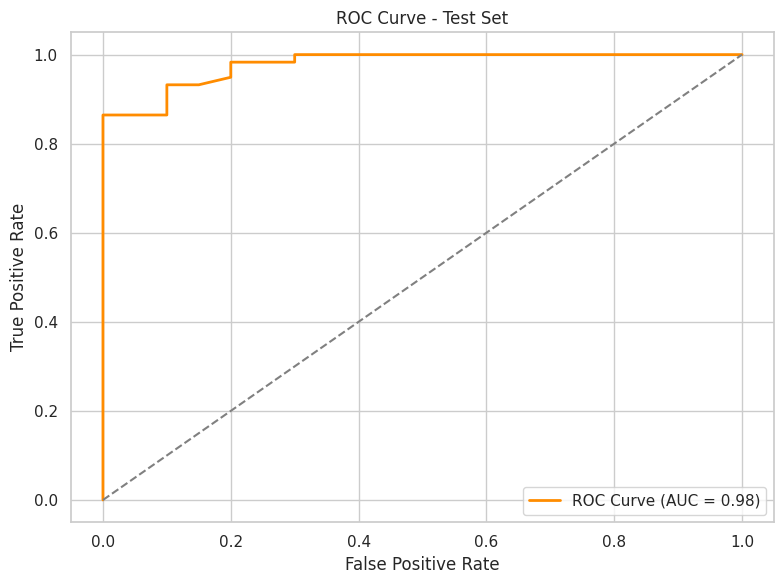

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Check if binary classification
if len(loaded_model.classes_) == 2:
    # Get predicted probabilities
    y_proba = loaded_model.predict_proba(X_test)[:, 1]

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=loaded_model.classes_[1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Test Set')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


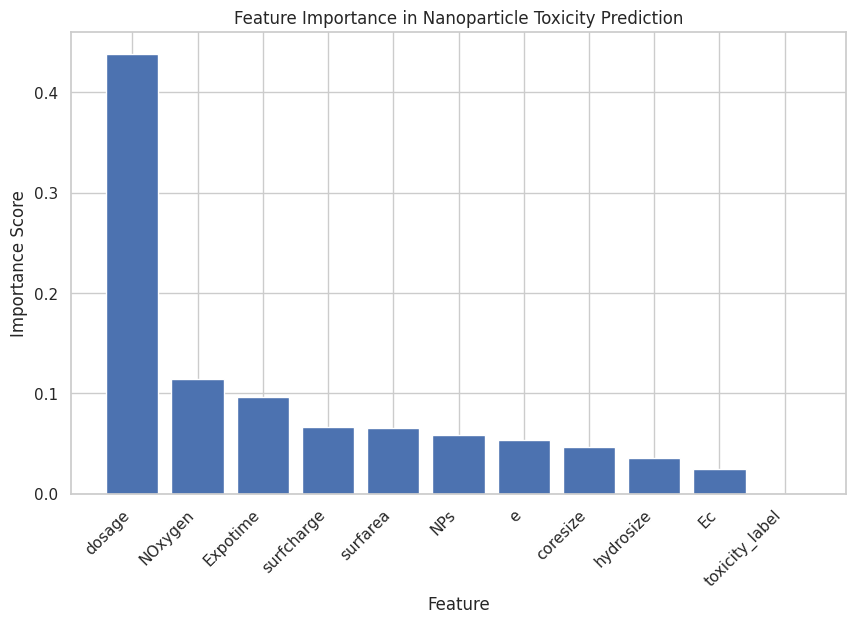

In [ ]:
#@title Feature Importance Analysis
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = loaded_model.feature_importances_

# Create a bar chart
features = X.columns
indices = np.argsort(feature_importances)[::-1]  # Sort by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Nanoparticle Toxicity Prediction")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()